In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
illumina_taxa = pd.read_csv('../illumina_Dan/final.minimap.cons.taxonomy', sep = '\t')
illumina_taxa = illumina_taxa[illumina_taxa['OTU'] != 'OTU1']
print(illumina_taxa.shape)
illumina_otus = pd.read_csv('../illumina_Dan/final.minimap.shared', sep = '\t')
illumina_otus = illumina_otus.drop('OTU1', axis = 1)
illumina_otus.set_index('group', inplace = True)
illumina_otus.drop(['label','numOtus'], axis = 1, inplace = True)
illumina_otus.columns = illumina_taxa['Taxonomy']
illumina_otus.index = illumina_otus.index + '_Il'
#Just pull out vortex and pro
illumina_otus_zymo = illumina_otus[illumina_otus.index.str.contains('Zymo')]
illumina_otus_zymo['Grouping'] = 'Zymo_Il'
illumina_otus_zymo = illumina_otus_zymo.groupby('Grouping').mean()
print(illumina_otus_zymo.shape)
illumina_otus_zymo.head()

(57332, 3)
(1, 57332)


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Taxonomy,k__Archaea;p__Crenarchaeota;c__MBGA;o__NRP-J;f__unclassified;g__unclassified;s__unclassified;otu__gg_537776;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;s__unclassified;otu__gg_1144154;,k__Archaea;p__Crenarchaeota;c__MCG;o__pGrfC26;f__unclassified;g__unclassified;s__unclassified;otu__gg_816371;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_107234;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1126596;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_256858;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4415327;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_541793;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_674344;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_809386;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_823663;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_95370;
Grouping,,,,,,,,,,,,,,,,,,,,,
Zymo_Il,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
minion_full_barcodes = pd.read_csv('../barcodes.csv', index_col=0)
minion_full_barcodes = minion_full_barcodes[minion_full_barcodes.index != 'barcode18']
print(minion_full_barcodes.shape)
minion_full_taxa = pd.read_csv('../minion_Dan/minimap/final.minimap.cons.taxonomy', sep = '\t')
minion_full_taxa = minion_full_taxa[minion_full_taxa['OTU'] != 'OTU1']
minion_full_otus = pd.read_csv('../minion_Dan/minimap/final.minimap.shared', sep = '\t')
minion_full_otus = minion_full_otus.drop('OTU1', axis = 1)
minion_full_otus = minion_full_otus[minion_full_otus['group'] != 'barcode18']
minion_full_otus = minion_full_otus[minion_full_otus['group'].isin(minion_full_barcodes.index)]
minion_full_otus['group'] = minion_full_barcodes['group'].values
minion_full_otus.drop(['label','numOtus'], axis = 1, inplace = True)
minion_full_otus['group'] = minion_full_otus['group'] + '_MF'
minion_full_otus.set_index('group', inplace = True)
minion_full_otus.columns = minion_full_taxa['Taxonomy']
minion_full_otus_zymo = minion_full_otus[(minion_full_otus.index.str.contains('Zym')) & (minion_full_otus.index.str.contains('Library3'))]
minion_full_otus_zymo.index = ['Zymo_MF']
print(minion_full_otus_zymo.shape)
minion_full_otus_zymo.head()

(85, 5)
(1, 58290)


Taxonomy,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__Korarchaeotaceae;g__unclassified;s__unclassified;otu__gg_142245;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__unclassified;g__unclassified;s__unclassified;otu__gg_142513;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__Korarchaeotales;f__unclassified;g__unclassified;s__unclassified;otu__gg_144658;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;s__unclassified;otu__gg_144656;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;s__unclassified;otu__gg_159805;,k__Archaea;p__Crenarchaeota;c__Korarchaeota;o__pJP78;f__unclassified;g__unclassified;s__unclassified;otu__gg_811072;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1019;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_250053;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_3240665;,k__Archaea;p__Crenarchaeota;c__MBGB;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_564250;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4363374;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4479190;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_534023;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_562348;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_625188;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_653625;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;
Zymo_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
minion_short_barcodes = pd.read_csv('../minion_Illumina_primers_Dan/barcodes_Illumina_minion.csv', index_col=0)
minion_short_barcodes['Barcode'] = ['barcode' + str(x).zfill(2) for x in minion_short_barcodes['Barcode']]
minion_short_barcodes['group'] = minion_short_barcodes.index
print(minion_short_barcodes.shape)
minion_short_taxa = pd.read_csv('../minion_Illumina_primers_Dan/final.minimap.cons.taxonomy', sep = '\t')
minion_short_taxa = minion_short_taxa[minion_short_taxa['OTU'] != 'OTU1']
print(minion_short_taxa.shape)
minion_short_otus = pd.read_csv('../minion_Illumina_primers_Dan/final.minimap.shared', sep = '\t')
minion_short_otus.drop('OTU1', axis = 1, inplace = True)
minion_short_otus = minion_short_otus[minion_short_otus['group'].isin(minion_short_barcodes['Barcode'])]
minion_short_barcodes = minion_short_barcodes[minion_short_barcodes['Barcode'].isin(minion_short_otus['group'])]
minion_short_otus['group'] = minion_short_barcodes.index.values
minion_short_otus.drop(['label','numOtus'], axis = 1, inplace = True)
minion_short_otus['group'] = minion_short_otus['group'] + '_MI'
minion_short_otus.set_index('group', inplace = True)
minion_short_otus.columns = minion_short_taxa['Taxonomy']
minion_short_otus_zymo = minion_short_otus[minion_short_otus.index.str.contains('Zymo')]
minion_short_otus_zymo.index = ['Zymo_MI']
print(minion_short_otus_zymo.shape)
minion_short_otus_zymo.head()

(30, 2)
(53031, 3)
(1, 53031)


Taxonomy,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_1122723;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_143107;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_427048;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362617;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_4362618;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_543169;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_572813;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_71074;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1145;otu__gg_716787;,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Nitrososphaerales;f__Nitrososphaeraceae;g__Candidatus_Nitrososphaera;s__SCA1170;otu__gg_101071;,...,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_4407785;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_520644;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_562348;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_653625;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_669210;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_674344;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_756593;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_818353;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_823663;,k__Bacteria;p__unclassified;c__unclassified;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_824583;
Zymo_MI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
zymo_otus_df = pd.concat([illumina_otus_zymo, minion_short_otus_zymo, minion_full_otus_zymo])

In [6]:
# minimap_otus = pd.read_csv('../Zymo_Dan/minimap/final.minimap.shared', sep = '\t')
# # OTU1 is empty
# minimap_otus = minimap_otus.drop(['label','numOtus','OTU1'], axis = 1)
# minimap_otus.set_index('group', inplace = True)
# minimap_tax = pd.read_csv('../Zymo_Dan/minimap/final.minimap.cons.taxonomy', sep = '\t')
# # OTU1 is empty
# minimap_tax = minimap_tax.drop(0)
# minimap_otus.columns = minimap_tax['Taxonomy']
# print(minimap_otus.sum(axis = 1))
# # for index, row in minimap_otus.iterrows():
# #     if 'minion' in index:
# #         print(index)
# #         minimap_otus.loc[index] = minimap_otus[minimap_otus > 200].fillna(0).loc[index]
# print(minimap_otus.sum(axis = 1))
# minimap_otus

In [7]:
zymo_otus_df.sum(axis = 1)

Zymo_Il     55747.5
Zymo_MI    116705.0
Zymo_MF     91138.0
dtype: float64

In [8]:
for index, row in zymo_otus_df.iterrows():
    print(row[row > 0].count())

2122
2949
1891


In [9]:
# vsearch_otus = pd.read_csv('../Zymo_Dan/vsearch_90/final.vsearch.shared', sep = '\t')
# vsearch_otus = vsearch_otus.drop(['label','numOtus'], axis = 1)
# vsearch_otus.set_index('group', inplace = True)
# vsearch_tax = pd.read_csv('../Zymo_Dan/vsearch_90/final.vsearch.cons.taxonomy', sep = '\t')
# vsearch_otus.columns = vsearch_tax['Taxonomy']
# print(vsearch_otus.sum(axis = 1))
# # for index, row in vsearch_otus.iterrows():
# #     if 'minion' in index:
# #         print(index)
# #         vsearch_otus.loc[index] = vsearch_otus[vsearch_otus > 200].fillna(0).loc[index]
# print(vsearch_otus.sum(axis = 1))
# vsearch_otus

In [10]:
# minimap_silva_otus = pd.read_csv('../Zymo_Dan/minimap_SILVA/final.minimap.shared', sep = '\t')
# # OTU1 is empty
# minimap_silva_otus = minimap_silva_otus.drop(['label','numOtus', 'OTU1'], axis = 1)
# minimap_silva_otus.set_index('group', inplace = True)
# # filtering out less than 200
# minimap_silva_tax = pd.read_csv('../Zymo_Dan/minimap_SILVA/final.minimap.cons.taxonomy', sep = '\t')
# # OTU1 is empty
# minimap_silva_tax = minimap_silva_tax.drop(0)
# minimap_silva_otus.columns = minimap_silva_tax['Taxonomy']
# print(minimap_silva_otus.sum(axis = 1))
# # for index, row in minimap_silva_otus.iterrows():
# #     if 'minion' in index:
# #         print(index)
# #         minimap_silva_otus.loc[index] = minimap_silva_otus[minimap_silva_otus > 200].fillna(0).loc[index]
# print(minimap_silva_otus.sum(axis = 1))
# minimap_silva_otus

In [11]:
# qiime_otus = pd.read_csv('../QIIME2/feature-table-genus-gg.txt', sep = '\t', skiprows=1, index_col=0).T
# qiime_otus = qiime_otus[qiime_otus.index.str.contains('Zymo')]
# qiime_otus.index.names = ['group']
# qiime_otus.columns = [x[:-2] + 'g__' if x[-3:] == ';__' else x for x in qiime_otus.columns]
# qiime_otus.columns = [x + ';' for x in qiime_otus.columns]
# qiime_otus.columns = [x.replace('__;', '__unclassified;') for x in qiime_otus.columns]
# qiime_otus

In [12]:
zymo_true = pd.DataFrame(index = ['Zymo'], data = {'Bacillus': [17.4], 'Enterococcus': [9.9], 'Enterobacteriaceae':[10.1],
                                                    'Lactobacillus':[18.4], 'Listeriaceae': [14.1], 'Pseudomonas': [4.2],
                                                   'Salmonella': [10.4], 'Staphylococcus': [15.5]})
zymo_true

,Bacillus,Enterococcus,Enterobacteriaceae,Lactobacillus,Listeriaceae,Pseudomonas,Salmonella,Staphylococcus
Zymo,17.4,9.9,10.1,18.4,14.1,4.2,10.4,15.5


In [13]:
def genus_family_alpha_diversity(df):
    df.index.name = 'group'
    columns = []
    for i in range(len(df.columns)):
        taxonomy = df.columns[i]
        if 'Listeriaceae' in taxonomy:
            columns.append('Listeriaceae')
        elif 'Salmonella' in taxonomy:
            columns.append('Salmonella')
        elif 'Enterobacteriaceae' in taxonomy:
            columns.append('Enterobacteriaceae')
        else:
            if taxonomy == 'unclassified':
                columns.append('unclassified')
            else:
#                 print(taxonomy)
                if '__' in taxonomy:
#                     print(taxonomy)
                    genus = taxonomy.split('g__')[1].split(';')[0]
                    if genus == 'unclassified':
                        columns.append('unclassified')
                    else:
                        columns.append(genus)
                else:
                    taxonomy_split = taxonomy.split(';')
#                     print(taxonomy_split)
                    if len(taxonomy_split) >= 6:
                        genus = taxonomy_split[5]
                    else:
#                         print('yes')
                        genus = 'unclassified'
                    columns.append(genus)
    df.columns = columns
    df = df.reset_index()
    df = df.melt(id_vars = 'group')
    df = df.groupby(['group','variable']).sum()
    df = df.unstack()
    return df

In [14]:
# minimap_otus_method = genus_family_alpha_diversity(minimap_otus.copy())
# minimap_otus_method['Method'] = 'Minimap_GG'
# vsearch_otus_method = genus_family_alpha_diversity(vsearch_otus.copy())
# vsearch_otus_method['Method'] = 'Vsearch_GG'
# minimap_silva_otus_method = genus_family_alpha_diversity(minimap_silva_otus.copy())
# minimap_silva_otus_method['Method'] = 'Minimap_SI'
# qiime_otus_method = genus_family_alpha_diversity(qiime_otus.copy())
# qiime_otus_method['Method'] = 'QIIME_GG'
# genus_taxa = pd.concat([minimap_otus_method, vsearch_otus_method, minimap_silva_otus_method, qiime_otus_method])
# genus_taxa.reset_index(inplace = True)
# genus_taxa['Sample'] = genus_taxa['group'] + '_' + genus_taxa['Method']
# genus_taxa.drop(['group','Method'], inplace = True, axis = 1)
genus_taxa = genus_family_alpha_diversity(zymo_otus_df.copy())
genus_taxa['Sample'] = genus_taxa.index
genus_taxa

value                                                               \
variable 02d06 1-68 4-29  A17 A55_D21 Abiotrophia Acaryochloris Acetobacter   
group                                                                         
Zymo_Il    0.0  0.0  0.0  0.0     0.0         3.0           0.0         0.0   
Zymo_MF    0.0  0.0  0.0  0.0     0.0         0.0           0.0         0.0   
Zymo_MI    0.0  0.0  0.0  0.0     0.0         5.0           0.0         0.0   

                                       ...                                 \
variable Acetobacterium Achromobacter  ... Zhihengliuella Zhouia Zoogloea   
group                                  ...                                  
Zymo_Il             0.0           0.0  ...            0.0    0.0      0.0   
Zymo_MF             0.0           0.0  ...            0.0    0.0      0.0   
Zymo_MI             0.0           0.0  ...            0.0    0.0      0.0   

                                                                         \
variable Zymomonas heteroC45_4W nsmpVI18 p-75-a5 unclassified vadinCA02   
group                                                                     
Zymo_Il        0.0          0.0      0.0     0.0       3535.5       0.0   
Zymo_MF        0.0          0.0      0.0     0.0       4138.0       0.0   
Zymo_MI        0.0          0.0      0.0     0.0       6383.0       0.0   

           Sample  
variable           
group              
Zymo_Il   Zymo_Il  
Zymo_MF   Zymo_MF  
Zymo_MI   Zymo_MI  

[3 rows x 895 columns]

In [15]:
genus_taxa_zymo_melted = genus_taxa.melt(id_vars = 'Sample')
genus_taxa_zymo_melted = genus_taxa_zymo_melted.groupby(['Sample', 'variable']).sum()
genus_taxa_zymo_melted = genus_taxa_zymo_melted.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
genus_taxa_zymo_melted.rename(columns= {'variable':'Genus','value':'Abundance'}, inplace = True)
genus_taxa_zymo_melted

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


,Sample,Genus,Abundance
0,Zymo_Il,02d06,0.000000
1,Zymo_Il,1-68,0.000000
2,Zymo_Il,4-29,0.000000
3,Zymo_Il,A17,0.000000
4,Zymo_Il,A55_D21,0.000000
...,...,...,...
2677,Zymo_MI,heteroC45_4W,0.000000
2678,Zymo_MI,nsmpVI18,0.000000
2679,Zymo_MI,p-75-a5,0.000000
2680,Zymo_MI,unclassified,5.469346


In [16]:
print(len(genus_taxa_zymo_melted[genus_taxa_zymo_melted['Sample'] == 'zymo_C_minion_full_Vsearch_GG']['Genus']))
print(len(genus_taxa_zymo_melted[genus_taxa_zymo_melted['Sample'] == 'zymo_C_minion_full_Minimap_GG']['Genus']))

0
0


In [17]:
df_index = genus_taxa_zymo_melted.groupby('Sample', sort=False).sum().index
df_columns = genus_taxa_zymo_melted[genus_taxa_zymo_melted['Sample'] == 'Zymo_Il']['Genus']
genus_zymo_reshaped = pd.DataFrame(index = df_index, columns = df_columns)
genus_zymo_reshaped

Genus,02d06,1-68,4-29,A17,A55_D21,Abiotrophia,Acaryochloris,Acetobacter,Acetobacterium,Achromobacter,...,ZA3312c,Zhihengliuella,Zhouia,Zoogloea,Zymomonas,heteroC45_4W,nsmpVI18,p-75-a5,unclassified,vadinCA02
Sample,,,,,,,,,,,,,,,,,,,,,
Zymo_Il,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zymo_MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zymo_MI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in df_index:
    for j in df_columns:
        if j in genus_taxa_zymo_melted[genus_taxa_zymo_melted['Sample']== i]['Genus'].values:
            genus_zymo_reshaped.loc[i,j] = genus_taxa_zymo_melted[(genus_taxa_zymo_melted['Sample'] == i) & (genus_taxa_zymo_melted['Genus'] == j)]['Abundance'].values[0]
        else:
            genus_zymo_reshaped.loc[i,j] = 0
genus_zymo_reshaped

Genus,02d06,1-68,4-29,A17,A55_D21,Abiotrophia,Acaryochloris,Acetobacter,Acetobacterium,Achromobacter,...,ZA3312c,Zhihengliuella,Zhouia,Zoogloea,Zymomonas,heteroC45_4W,nsmpVI18,p-75-a5,unclassified,vadinCA02
Sample,,,,,,,,,,,,,,,,,,,,,
Zymo_Il,0,0,0,0,0,0.00538141,0,0,0,0,...,0,0,0,0,0,0,0,0,6.34199,0
Zymo_MF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.54037,0
Zymo_MI,0,0,0,0,0,0.00428431,0,0,0,0,...,0,0,0,0,0,0,0,0,5.46935,0


In [19]:
genus_zymo_reshaped_final = genus_zymo_reshaped.copy()
for i in df_columns:
    if genus_zymo_reshaped_final[i].mean() < 2:
        genus_zymo_reshaped_final = genus_zymo_reshaped_final.rename(columns = {i:'Other'})
genus_zymo_reshaped_final = genus_zymo_reshaped_final.groupby(genus_zymo_reshaped_final.columns, axis=1).sum()
genus_zymo_reshaped_final.to_csv('../Tables/genus_zymo_taxa_rel_abund.csv')

In [20]:
genus_zymo_reshaped_final

Genus,Bacillus,Enterobacteriaceae,Enterococcus,Lactobacillus,Listeriaceae,Other,Pseudomonas,Salmonella,Staphylococcus,unclassified
Sample,,,,,,,,,,
Zymo_Il,19.119243,12.942284,7.446074,17.834880,9.699090,1.994708,4.304229,8.679313,11.638190,6.341988
Zymo_MF,27.890671,7.393184,7.631284,16.058066,14.799535,1.804955,2.434769,6.927955,10.519213,4.540367
Zymo_MI,19.449895,18.631592,5.843794,12.385073,10.412579,1.543207,5.291975,6.741785,14.230753,5.469346


In [21]:
genus_zymo_reshaped_final_full = pd.concat([genus_zymo_reshaped_final, zymo_true])

In [22]:
genus_zymo_reshaped_final_full.sum(axis = 1)

Zymo_Il    100.0
Zymo_MF    100.0
Zymo_MI    100.0
Zymo       100.0
dtype: float64

In [23]:
full_df_diff = genus_zymo_reshaped_final_full.copy()
for index, row in full_df_diff.iterrows():
    full_df_diff.loc[index] = abs(full_df_diff.loc[index] - full_df_diff.loc['Zymo'])
percentages_diff = full_df_diff.sum(axis = 1)/(len(full_df_diff.loc['Zymo']))

Text(0.5, 0, '')

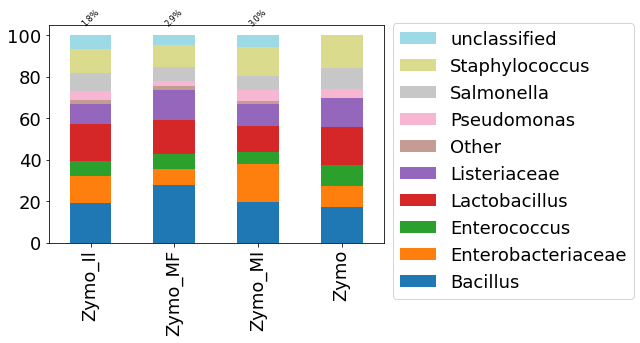

In [24]:
ax = genus_zymo_reshaped_final_full.plot(kind='bar', stacked=True, cmap='tab20', fontsize=18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.0, 1.05), loc=2, fontsize = 18)
for i in range(len(genus_zymo_reshaped_final_full.index) - 1):
    ax.annotate(format(percentages_diff[i], '.1f') + '%',
                   (i, 105), ha='center', va='center',
                   size=8, xytext=(0, 8), rotation = 45,
                   textcoords='offset points')
ax.set_xlabel('', fontsize = 18)

# Beta diversity

In [25]:
from skbio.diversity import beta_diversity

In [26]:
# minimap_otus_diversity = minimap_otus.copy()
# minimap_otus_diversity.columns = [';'.join(x.split(';')[0:7]) for x in minimap_otus_diversity.columns]
# minimap_otus_diversity.index = [x + '_mm_gg' for x in minimap_otus_diversity.index]
# # df = df.melt(id_vars = 'group')
# #     df = df.groupby(['group','variable']).sum()
# #     df = df.unstack()
# vsearch_otus_diversity = vsearch_otus.copy()
# vsearch_otus_diversity.columns = [';'.join(x.split(';')[0:7]) for x in vsearch_otus_diversity.columns]
# vsearch_otus_diversity.index = [x + '_vs_gg' for x in vsearch_otus_diversity.index]

# minimap_otus_diversity.reset_index(inplace = True)
# minimap_otus_diversity = minimap_otus_diversity.melt(id_vars = 'index').groupby(['index','variable']).sum()
# minimap_otus_diversity = minimap_otus_diversity.unstack()

# vsearch_otus_diversity.reset_index(inplace = True)
# vsearch_otus_diversity = vsearch_otus_diversity.melt(id_vars = 'index').groupby(['index','variable']).sum()
# vsearch_otus_diversity = vsearch_otus_diversity.unstack()

# full_otus = pd.concat([minimap_otus_diversity, vsearch_otus_diversity]).fillna(0)

In [27]:
genus_zymo_reshaped_full = pd.concat([genus_zymo_reshaped, zymo_true])

In [28]:
bc_dm = beta_diversity('braycurtis', genus_zymo_reshaped_full.fillna(0), genus_zymo_reshaped_full.index)

In [29]:
bc_df_genus_df = pd.DataFrame(bc_dm.data, index = bc_dm.ids, columns = bc_dm.ids)

In [30]:
# genus_zymo_reshaped_final_full_grouped = genus_zymo_reshaped_final_full[(genus_zymo_reshaped_final_full.index.str.contains('Minimap')) | (genus_zymo_reshaped_final_full.index == 'Zymo')].copy()
# genus_zymo_reshaped_final_full_grouped = genus_zymo_reshaped_final_full_grouped[~genus_zymo_reshaped_final_full_grouped.index.str.contains('SI')]
# index_names = []
# for i in genus_zymo_reshaped_final_full_grouped.index:
#     if 'minion_full' in i:
#         index_names.append('minion_full')
#     elif 'minion_illumina' in i:
#         index_names.append('minion_illumina')
#     elif 'miseq' in i:
#         index_names.append('illumina')
#     else:
#         index_names.append(i)
# genus_zymo_reshaped_final_full_grouped['index'] = index_names
# genus_zymo_reshaped_final_full_grouped = genus_zymo_reshaped_final_full_grouped.groupby('index').mean()
# genus_zymo_reshaped_final_full_grouped = genus_zymo_reshaped_final_full_grouped.reindex(sorted(genus_zymo_reshaped_final_full_grouped.columns), axis=1)
# genus_zymo_reshaped_final_full_grouped.sort_index(ascending=False, inplace = True)
# genus_zymo_reshaped_final_full_grouped

In [31]:
genus_zymo_reshaped_final_full

,Bacillus,Enterobacteriaceae,Enterococcus,Lactobacillus,Listeriaceae,Other,Pseudomonas,Salmonella,Staphylococcus,unclassified
Zymo_Il,19.119243,12.942284,7.446074,17.834880,9.699090,1.994708,4.304229,8.679313,11.638190,6.341988
Zymo_MF,27.890671,7.393184,7.631284,16.058066,14.799535,1.804955,2.434769,6.927955,10.519213,4.540367
Zymo_MI,19.449895,18.631592,5.843794,12.385073,10.412579,1.543207,5.291975,6.741785,14.230753,5.469346
Zymo,17.400000,10.100000,9.900000,18.400000,14.100000,NaN,4.200000,10.400000,15.500000,NaN


In [32]:
genus_zymo_reshaped_final_full = genus_zymo_reshaped_final_full.reindex(['Zymo_MF','Zymo_MI','Zymo_Il','Zymo'])

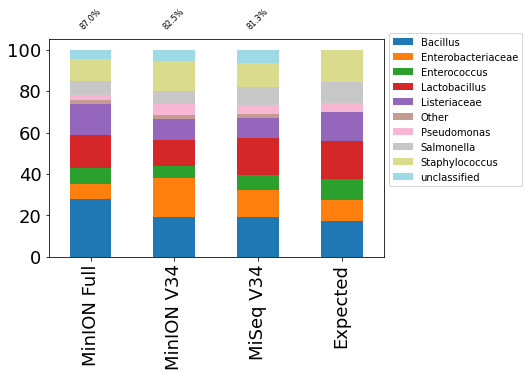

In [35]:
ax = genus_zymo_reshaped_final_full.plot(kind='bar', stacked=True, cmap='tab20', fontsize=18)
handles, labels = ax.get_legend_handles_labels()
for i in range(len(genus_zymo_reshaped_full.index) - 1):
    ax.annotate(format(100 - bc_df_genus_df['Zymo'].values[i] * 100, '.1f') + '%',
                   (i, 105), ha='center', va='bottom',
                   size=8, xytext=(0, 8),
                   textcoords='offset points', rotation=45)
ax.set_xlabel('', fontsize = 18)
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, bbox_to_anchor=(1.0, 1.05), loc=2)
ax.set_xticklabels(['MinION Full','MinION V34','MiSeq V34','Expected'])
plt.savefig('../Figures/Zymo_comparison_beta_genera.jpg', bbox_inches = 'tight', dpi = 300)

# Alpha diversity

In [30]:
from skbio.diversity import alpha_diversity

In [31]:
minimap_otus = pd.read_csv('../Zymo_Dan/minimap/final.minimap.shared', sep = '\t')
# OTU1 is empty
minimap_otus = minimap_otus.drop(['label','numOtus','OTU1'], axis = 1)
minimap_otus.set_index('group', inplace = True)
minimap_tax = pd.read_csv('../Zymo_Dan/minimap/final.minimap.cons.taxonomy', sep = '\t')
# OTU1 is empty
minimap_tax = minimap_tax.drop(0)
minimap_otus.columns = minimap_tax['Taxonomy']
minimap_otus.index = [x + '_mm_gg' for x in minimap_otus.index]
minimap_otus

Taxonomy,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__mb2424;g__unclassified;s__unclassified;otu__gg_810882;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_1139886;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_114018;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_114260;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_249325;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_3770158;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_4318789;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_618743;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_663691;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_732154;,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__Ignatzschineria;s__unclassified;otu__gg_1051927;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__Thermomonas;s__fusca;otu__gg_108726;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__unclassified;s__unclassified;otu__gg_4361455;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__unclassified;s__unclassified;otu__gg_4401405;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Xanthomonadales;f__Xanthomonadaceae;g__unclassified;s__unclassified;otu__gg_573184;,k__Bacteria;p__Proteobacteria;c__TA18;o__PHOS-HD29;f__unclassified;g__unclassified;s__unclassified;otu__gg_253302;,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Acholeplasmatales;f__unclassified;g__unclassified;s__unclassified;otu__gg_517466;,k__Bacteria;p__Tenericutes;c__Mollicutes;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_1105985;,k__Bacteria;p__Tenericutes;c__Mollicutes;o__unclassified;f__unclassified;g__unclassified;s__unclassified;otu__gg_560685;,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__DA101;s__unclassified;otu__gg_104216;
zymo_A_minion_full_mm_gg,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
zymo_A_minion_illumina_mm_gg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
zymo_A_miseq_illumina_mm_gg,0,1,1,1,1,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
zymo_B_minion_full_mm_gg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
zymo_B_miseq_illumina_mm_gg,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1
zymo_C_minion_full_mm_gg,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [32]:
vsearch_otus = pd.read_csv('../Zymo_Dan/vsearch_90/final.vsearch.shared', sep = '\t')
vsearch_otus = vsearch_otus.drop(['label','numOtus'], axis = 1)
vsearch_otus.set_index('group', inplace = True)
vsearch_tax = pd.read_csv('../Zymo_Dan/vsearch_90/final.vsearch.cons.taxonomy', sep = '\t')
vsearch_otus.columns = vsearch_tax['Taxonomy']
vsearch_otus.index = [x + '_vs_gg' for x in vsearch_otus.index]
vsearch_otus

Taxonomy,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_225798;,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__EB1017;g__unclassified;s__unclassified;otu__gg_542243;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Cellulomonadaceae;g__Cellulomonas;s__unclassified;otu__gg_61987;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Frankiaceae;g__unclassified;s__unclassified;otu__gg_1105078;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Frankiaceae;g__unclassified;s__unclassified;otu__gg_552883;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Frankiaceae;g__unclassified;s__unclassified;otu__gg_848195;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Intrasporangiaceae;g__Tetrasphaera;s__unclassified;otu__gg_4437420;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Kineosporiaceae;g__unclassified;s__unclassified;otu__gg_780282;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Microbacteriaceae;g__Leucobacter;s__unclassified;otu__gg_807035;,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae;g__Arthrobacter;s__unclassified;otu__gg_152113;,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_4454529;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_463301;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_541120;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_566939;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_633617;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_760529;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_833650;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_836394;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_849314;,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__DA101;s__unclassified;otu__gg_104216;
zymo_A_minion_full_vs_gg,0,0,0,0,0,0,0,0,0,0,...,47,0,0,0,0,0,0,0,0,0
zymo_A_minion_illumina_vs_gg,0,0,0,0,0,0,0,0,0,0,...,25,1,5,20,0,1,55,0,0,0
zymo_A_miseq_illumina_vs_gg,1,0,0,0,1,0,0,0,0,0,...,13,0,0,3,0,1,11,0,1,0
zymo_B_minion_full_vs_gg,0,0,0,0,0,0,0,0,0,0,...,36,0,0,0,0,0,0,0,0,0
zymo_B_miseq_illumina_vs_gg,0,1,1,1,0,1,1,1,1,1,...,24,0,0,12,1,4,35,1,0,1
zymo_C_minion_full_vs_gg,0,0,0,0,0,0,0,0,0,0,...,31,0,0,0,0,0,0,0,0,0


In [33]:
full_alpha_df = pd.concat([minimap_otus, vsearch_otus]).fillna(0)

In [34]:
full_alpha_df

,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__mb2424;g__unclassified;s__unclassified;otu__gg_810882;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_1139886;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_114018;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_114260;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_249325;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_3770158;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_4318789;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_618743;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_663691;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_732154;,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__unclassified;s__unclassified;otu__gg_817619;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__unclassified;s__unclassified;otu__gg_905674;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__nitroreducens;otu__gg_182880;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_4407224;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_582124;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_640071;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_648049;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_463301;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_836394;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_849314;
zymo_A_minion_full_mm_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_A_minion_illumina_mm_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_A_miseq_illumina_mm_gg,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_B_minion_full_mm_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_B_miseq_illumina_mm_gg,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_C_minion_full_mm_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_A_minion_full_vs_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_A_minion_illumina_vs_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
zymo_A_miseq_illumina_vs_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
zymo_B_minion_full_vs_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
def genus_family_alpha_diversity_no_unclassified(df):
    columns = []
    for i in range(len(df.columns)):
        taxonomy = df.columns[i]
        if 'Listeriaceae' in taxonomy:
            columns.append('Listeriaceae')
        elif 'Salmonella' in taxonomy:
            columns.append('Salmonella')
        elif 'Enterobacteriaceae' in taxonomy:
            columns.append('Enterobacteriaceae')
        else:
#             print(taxonomy)
            if taxonomy == 'unclassified':
                columns.append('unclassified')
            else:
                genus = taxonomy.split('g__')[1].split(';')[0]
                if genus == 'unclassified':
                    columns.append('unclassified')
                else:
                    columns.append(genus)
    df.columns = columns
#     print(df)
    df = df.reset_index()
    df.drop('unclassified', axis = 1, inplace = True)
    df = df.melt(id_vars = 'index')
    df = df.groupby(['index','variable']).sum()
    df = df.unstack()
    return df

In [37]:
# # OTU count threshold
# start = time.time()
# filter_threshold = []
# alpha_dict = {key: [] for key in full_alpha_df.index}
# beta_dict = {key: [] for key in full_alpha_df.index}
# alpha_dict_first = {key: 0 for key in full_alpha_df.index}
# beta_dict_first = {key: 0 for key in full_alpha_df.index}
# for i in range(0, 2000, 10):
#     filter_threshold.append(i)
#     full_alpha_filtered = full_alpha_df[full_alpha_df > i].copy().fillna(0)
#     full_alpha_filtered_genus = genus_family_alpha_diversity_no_unclassified(full_alpha_filtered)
#     observed_otus_filtered = alpha_diversity('observed_otus', full_alpha_filtered_genus, full_alpha_filtered_genus.index)
#     full_alpha_filtered_genus.columns = full_alpha_filtered_genus.columns.droplevel()
#     full_alpha_filtered_genus_tmp = full_alpha_filtered_genus.copy().reset_index()
#     full_alpha_filtered_genus_tmp_melted = full_alpha_filtered_genus_tmp.melt(id_vars = 'index')
#     full_alpha_filtered_genus_tmp_melted = full_alpha_filtered_genus_tmp_melted.groupby(['index', 'variable']).sum()
#     full_alpha_filtered_genus_tmp_melted = full_alpha_filtered_genus_tmp_melted.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
#     full_alpha_filtered_genus_tmp_melted.rename(columns= {'variable':'Genus','value':'Abundance'}, inplace = True)

#     df_index = full_alpha_filtered_genus_tmp_melted.groupby('index', sort=False).sum().index
#     df_columns = full_alpha_filtered_genus_tmp_melted[full_alpha_filtered_genus_tmp_melted['index'] == 'zymo_C_minion_full_vs_gg']['Genus']
#     full_alpha_filtered_genus_tmp_melted_reshaped = pd.DataFrame(index = df_index, columns = df_columns)

#     for h in df_index:
#         for k in df_columns:
#             if k in full_alpha_filtered_genus_tmp_melted[full_alpha_filtered_genus_tmp_melted['index']== h]['Genus'].values:
#                 full_alpha_filtered_genus_tmp_melted_reshaped.loc[h,k] = full_alpha_filtered_genus_tmp_melted[(full_alpha_filtered_genus_tmp_melted['index'] == h) & (full_alpha_filtered_genus_tmp_melted['Genus'] == k)]['Abundance'].values[0]
#             else:
#                 full_alpha_filtered_genus_tmp_melted_reshaped.loc[i,j] = 0
#     full_alpha_filtered_genus_tmp_melted_reshaped = full_alpha_filtered_genus_tmp_melted_reshaped.fillna(0)
#     tmp_df = pd.concat([full_alpha_filtered_genus_tmp_melted_reshaped, zymo_true]).fillna(0)
#     bc_dm_genus_tmp = beta_diversity('braycurtis', tmp_df.fillna(0), tmp_df.index)
#     bc_df_genus_df_tmp = pd.DataFrame(bc_dm_genus_tmp.data, index = bc_dm_genus_tmp.ids, columns = bc_dm_genus_tmp.ids)
#     for j in range(len(alpha_dict.keys())):
#         if observed_otus_filtered[j] <= 8:
#             if alpha_dict_first[list(alpha_dict_first.keys())[j]] == 0:
#                 alpha_dict_first[list(alpha_dict_first.keys())[j]] = i
#             if beta_dict_first[list(beta_dict_first.keys())[j]] == 0:
#                 beta_dict_first[list(beta_dict_first.keys())[j]] = bc_df_genus_df_tmp.loc['Zymo',list(beta_dict.keys())[j]]
#         alpha_dict[list(alpha_dict.keys())[j]].append(observed_otus_filtered[j])
#         beta_dict[list(beta_dict.keys())[j]].append(bc_df_genus_df_tmp.loc['Zymo',list(beta_dict.keys())[j]])
# end = time.time()
# print(end - start)

387.00143671035767


In [39]:
threshold_first_df = pd.DataFrame({'Alpha threshold': alpha_dict_first.values(), 'Beta diversity': beta_dict_first.values()}, index = beta_dict_first.keys())
threshold_first_df['Beta diversity'] = round(threshold_first_df['Beta diversity'], 2)
threshold_first_df

,Alpha threshold,Beta diversity
zymo_A_minion_full_mm_gg,1490,0.23
zymo_A_minion_illumina_mm_gg,450,0.11
zymo_A_miseq_illumina_mm_gg,380,0.25
zymo_B_minion_full_mm_gg,190,0.18
zymo_B_miseq_illumina_mm_gg,170,0.10
zymo_C_minion_full_mm_gg,170,0.18
zymo_A_minion_full_vs_gg,920,0.16
zymo_A_minion_illumina_vs_gg,350,0.11
zymo_A_miseq_illumina_vs_gg,370,0.20
zymo_B_minion_full_vs_gg,360,0.19


In [40]:
threshold_first_df['Alpha threshold'].mean()

482.5

In [41]:
beta_threshold_df = pd.DataFrame(beta_dict, index = filter_threshold).reset_index().melt(id_vars = 'index')
beta_threshold_df.columns = ['Threshold', 'Sample', 'Beta diversity']
beta_threshold_df[beta_threshold_df['Threshold'] == 480]

,Threshold,Sample,Beta diversity
48,480,zymo_A_minion_full_mm_gg,0.162583
248,480,zymo_A_minion_illumina_mm_gg,0.110273
448,480,zymo_A_miseq_illumina_mm_gg,0.381442
648,480,zymo_B_minion_full_mm_gg,0.209758
848,480,zymo_B_miseq_illumina_mm_gg,0.208919
1048,480,zymo_C_minion_full_mm_gg,0.216259
1248,480,zymo_A_minion_full_vs_gg,0.143794
1448,480,zymo_A_minion_illumina_vs_gg,0.150435
1648,480,zymo_A_miseq_illumina_vs_gg,0.227507
1848,480,zymo_B_minion_full_vs_gg,0.186163


In [42]:
alpha_threshold_df = pd.DataFrame(alpha_dict, index = filter_threshold).reset_index().melt(id_vars = 'index')
alpha_threshold_df.columns = ['Threshold', 'Sample', 'Alpha diversity']
alpha_threshold_df[alpha_threshold_df['Threshold'] == 480]

,Threshold,Sample,Alpha diversity
48,480,zymo_A_minion_full_mm_gg,9
248,480,zymo_A_minion_illumina_mm_gg,8
448,480,zymo_A_miseq_illumina_mm_gg,8
648,480,zymo_B_minion_full_mm_gg,8
848,480,zymo_B_miseq_illumina_mm_gg,5
1048,480,zymo_C_minion_full_mm_gg,6
1248,480,zymo_A_minion_full_vs_gg,9
1448,480,zymo_A_minion_illumina_vs_gg,7
1648,480,zymo_A_miseq_illumina_vs_gg,8
1848,480,zymo_B_minion_full_vs_gg,8


In [44]:
threshold_first_df_combined = alpha_threshold_df.copy()
threshold_first_df_combined['Beta diversity'] = beta_threshold_df['Beta diversity']
threshold_first_df_combined.to_csv('../Tables/threshold_df_alpha_beta_diversity.csv', index = False)
threshold_first_df_combined[threshold_first_df_combined['Threshold'] == 480]

,Threshold,Sample,Alpha diversity,Beta diversity
48,480,zymo_A_minion_full_mm_gg,9,0.162583
248,480,zymo_A_minion_illumina_mm_gg,8,0.110273
448,480,zymo_A_miseq_illumina_mm_gg,8,0.381442
648,480,zymo_B_minion_full_mm_gg,8,0.209758
848,480,zymo_B_miseq_illumina_mm_gg,5,0.208919
1048,480,zymo_C_minion_full_mm_gg,6,0.216259
1248,480,zymo_A_minion_full_vs_gg,9,0.143794
1448,480,zymo_A_minion_illumina_vs_gg,7,0.150435
1648,480,zymo_A_miseq_illumina_vs_gg,8,0.227507
1848,480,zymo_B_minion_full_vs_gg,8,0.186163


In [47]:
lowest_beta_threshold = {key: 0 for key in threshold_first_df_combined['Sample']}
for i in set(threshold_first_df_combined['Sample']):
    tmp_df = threshold_first_df_combined[threshold_first_df_combined['Sample'] == i]
    min_beta = min(tmp_df['Beta diversity'])
    lowest_beta_threshold[i] = tmp_df[tmp_df['Beta diversity'] == min_beta]['Threshold'].values[0]

In [55]:
lowest_beta_threshold

{'zymo_A_minion_full_mm_gg': 160,
 'zymo_A_minion_illumina_mm_gg': 310,
 'zymo_A_miseq_illumina_mm_gg': 30,
 'zymo_B_minion_full_mm_gg': 0,
 'zymo_B_miseq_illumina_mm_gg': 30,
 'zymo_C_minion_full_mm_gg': 0,
 'zymo_A_minion_full_vs_gg': 160,
 'zymo_A_minion_illumina_vs_gg': 210,
 'zymo_A_miseq_illumina_vs_gg': 100,
 'zymo_B_minion_full_vs_gg': 870,
 'zymo_B_miseq_illumina_vs_gg': 320,
 'zymo_C_minion_full_vs_gg': 0}

In [54]:
sum(lowest_beta_threshold.values())/len(lowest_beta_threshold.values())

182.5

In [256]:
tmp_calc_df = pd.DataFrame(threshold_first_df_combined[threshold_first_df_combined['Threshold'] == 480]['Beta diversity']).copy()
tmp_calc_df['500'] = threshold_first_df_combined[threshold_first_df_combined['Threshold'] == 500]['Beta diversity'].values

In [258]:
tmp_calc_df['Beta diversity'] - tmp_calc_df['500']

48     -0.002745
248     0.001510
448     0.000000
648    -0.004508
848    -0.003517
1048    0.000000
1248   -0.009577
1448   -0.006723
1648    0.000000
1848    0.000000
2048   -0.008263
2248    0.000000
dtype: float64

In [206]:
alpha_threshold_df[alpha_threshold_df['Sample'] == 'zymo_A_minion_full_vs_gg']

,Threshold,Sample,Alpha diversity
1200,0,zymo_A_minion_full_vs_gg,36
1201,10,zymo_A_minion_full_vs_gg,11
1202,20,zymo_A_minion_full_vs_gg,10
1203,30,zymo_A_minion_full_vs_gg,10
1204,40,zymo_A_minion_full_vs_gg,10
...,...,...,...
1395,1950,zymo_A_minion_full_vs_gg,6
1396,1960,zymo_A_minion_full_vs_gg,6
1397,1970,zymo_A_minion_full_vs_gg,6
1398,1980,zymo_A_minion_full_vs_gg,6


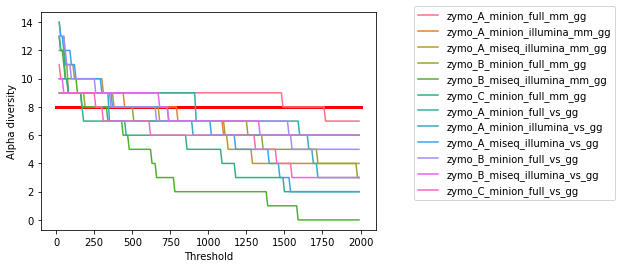

In [100]:
plt.plot([0,2000],[8,8], color = 'red', linewidth = 3)
sns.lineplot(x = 'Threshold', y = 'Alpha diversity', hue = 'Sample', data = alpha_threshold_df[alpha_threshold_df['Threshold'] > 10])
plt.legend(bbox_to_anchor=(1.1, 1.05))

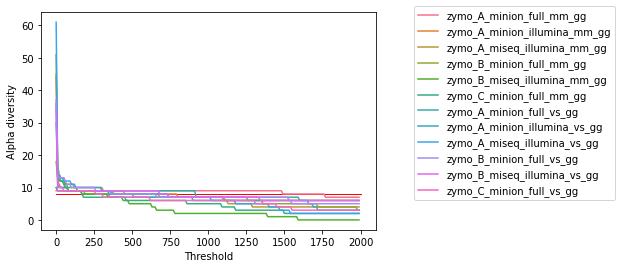

In [96]:
plt.plot([0,2000],[8,8], color = 'red', linewidth = 1)
sns.lineplot(x = 'Threshold', y = 'Alpha diversity', hue = 'Sample', data = alpha_threshold_df)
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [80]:
full_alpha_genus_tmp_melted

,index,Genus,Abundance
0,zymo_A_minion_full_mm_gg,Abiotrophia,0.000681
1,zymo_A_minion_full_mm_gg,Acinetobacter,0.002042
2,zymo_A_minion_full_mm_gg,Actinomyces,0.000000
3,zymo_A_minion_full_mm_gg,Actinopolymorpha,0.000000
4,zymo_A_minion_full_mm_gg,Adhaeribacter,0.000000
...,...,...,...
1363,zymo_C_minion_full_vs_gg,Vagococcus,0.000000
1364,zymo_C_minion_full_vs_gg,Vibrio,0.000000
1365,zymo_C_minion_full_vs_gg,Virgibacillus,0.000000
1366,zymo_C_minion_full_vs_gg,Wautersiella,0.000000


In [87]:
full_alpha_genus_tmp_melted_filtered.sum().sum()

1186.8954685852486

In [99]:
# Percent count threshold
start = time.time()
filter_threshold = []
alpha_dict_percent = {key: [] for key in full_alpha_df.index}
beta_dict_percent = {key: [] for key in full_alpha_df.index}
alpha_dict_first_percent = {key: 0 for key in full_alpha_df.index}
beta_dict_first_percent = {key: 0 for key in full_alpha_df.index}
for i in np.arange(0, 1.5, 0.01):
    filter_threshold.append(i)
    full_alpha_genus = genus_family_alpha_diversity_no_unclassified(full_alpha_df.copy())
    full_alpha_genus.columns = full_alpha_genus.columns.droplevel()
    full_alpha_genus_tmp = full_alpha_genus.copy().reset_index()
    full_alpha_genus_tmp_melted = full_alpha_genus_tmp.melt(id_vars = 'index')
    full_alpha_genus_tmp_melted = full_alpha_genus_tmp_melted.groupby(['index', 'variable']).sum()
    full_alpha_genus_tmp_melted = full_alpha_genus_tmp_melted.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
    full_alpha_genus_tmp_melted.rename(columns= {'variable':'Genus','value':'Abundance'}, inplace = True)
    df_index = full_alpha_genus_tmp_melted.groupby('index', sort=False).sum().index
    df_columns = full_alpha_genus_tmp_melted[full_alpha_genus_tmp_melted['index'] == 'zymo_C_minion_full_vs_gg']['Genus']
    full_alpha_filtered_genus_tmp_melted_reshaped = pd.DataFrame(index = df_index, columns = df_columns)
    for h in df_index:
        for k in df_columns:
            if k in full_alpha_filtered_genus_tmp_melted[full_alpha_filtered_genus_tmp_melted['index']== h]['Genus'].values:
                full_alpha_filtered_genus_tmp_melted_reshaped.loc[h,k] = full_alpha_filtered_genus_tmp_melted[(full_alpha_filtered_genus_tmp_melted['index'] == h) & (full_alpha_filtered_genus_tmp_melted['Genus'] == k)]['Abundance'].values[0]
            else:
                full_alpha_filtered_genus_tmp_melted_reshaped.loc[i,j] = 0
    full_alpha_filtered_genus_tmp_melted_reshaped = full_alpha_filtered_genus_tmp_melted_reshaped.fillna(0)
    full_alpha_filtered_genus_tmp_melted_reshaped = full_alpha_filtered_genus_tmp_melted_reshaped[full_alpha_filtered_genus_tmp_melted_reshaped > i].copy().fillna(0)
    observed_otus_filtered = alpha_diversity('observed_otus', full_alpha_filtered_genus_tmp_melted_reshaped, full_alpha_filtered_genus_tmp_melted_reshaped.index)
    tmp_df = pd.concat([full_alpha_filtered_genus_tmp_melted_reshaped, zymo_true]).fillna(0)
    bc_dm_genus_tmp = beta_diversity('braycurtis', tmp_df.fillna(0), tmp_df.index)
    bc_df_genus_df_tmp = pd.DataFrame(bc_dm_genus_tmp.data, index = bc_dm_genus_tmp.ids, columns = bc_dm_genus_tmp.ids)
    for j in range(len(alpha_dict_percent.keys())):
        if observed_otus_filtered[j] <= 8:
            if alpha_dict_first_percent[list(alpha_dict_first_percent.keys())[j]] == 0:
                alpha_dict_first_percent[list(alpha_dict_first_percent.keys())[j]] = i
            if beta_dict_first_percent[list(beta_dict_first_percent.keys())[j]] == 0:
                beta_dict_first_percent[list(beta_dict_first_percent.keys())[j]] = bc_df_genus_df_tmp.loc['Zymo',list(beta_dict.keys())[j]]
        alpha_dict_percent[list(alpha_dict_percent.keys())[j]].append(observed_otus_filtered[j])
        beta_dict_percent[list(beta_dict_percent.keys())[j]].append(bc_df_genus_df_tmp.loc['Zymo',list(beta_dict.keys())[j]])
end = time.time()
print(end - start)

207.77322578430176


In [168]:
def return_threshold_df(alpha_dict, beta_dict, filter_threshold, name):
    alpha_threshold_df = pd.DataFrame(alpha_dict, index = filter_threshold).reset_index().melt(id_vars = 'index')
    alpha_threshold_df.columns = ['Threshold', 'Sample', 'Alpha diversity']
    beta_threshold_df = pd.DataFrame(beta_dict, index = filter_threshold).reset_index().melt(id_vars = 'index')
    beta_threshold_df.columns = ['Threshold', 'Sample', 'Beta diversity']
    threshold_first_df_combined = alpha_threshold_df.copy()
    threshold_first_df_combined['Beta diversity'] = beta_threshold_df['Beta diversity']
    threshold_first_df_combined.to_csv('../Tables/threshold_df_alpha_beta_diversity_' + name +'.csv', index = False)
    return threshold_first_df_combined

In [100]:
alpha_threshold_df_percent = pd.DataFrame(alpha_dict_percent, index = filter_threshold).reset_index().melt(id_vars = 'index')
alpha_threshold_df_percent.columns = ['Threshold', 'Sample', 'Alpha diversity']
alpha_threshold_df_percent[alpha_threshold_df_percent['Threshold'] == 0.1]

,Threshold,Sample,Alpha diversity
10,0.1,zymo_A_minion_full_mm_gg,9
160,0.1,zymo_A_minion_illumina_mm_gg,9
310,0.1,zymo_A_miseq_illumina_mm_gg,13
460,0.1,zymo_B_minion_full_mm_gg,11
610,0.1,zymo_B_miseq_illumina_mm_gg,14
760,0.1,zymo_C_minion_full_mm_gg,13
910,0.1,zymo_A_minion_full_vs_gg,9
1060,0.1,zymo_A_minion_illumina_vs_gg,9
1210,0.1,zymo_A_miseq_illumina_vs_gg,13
1360,0.1,zymo_B_minion_full_vs_gg,13


In [101]:
beta_threshold_df_percent = pd.DataFrame(beta_dict_percent, index = filter_threshold).reset_index().melt(id_vars = 'index')
beta_threshold_df_percent.columns = ['Threshold', 'Sample', 'Beta diversity']
beta_threshold_df_percent[beta_threshold_df_percent['Threshold'] == 0.1]

,Threshold,Sample,Beta diversity
10,0.1,zymo_A_minion_full_mm_gg,0.145943
160,0.1,zymo_A_minion_illumina_mm_gg,0.157232
310,0.1,zymo_A_miseq_illumina_mm_gg,0.111301
460,0.1,zymo_B_minion_full_mm_gg,0.150535
610,0.1,zymo_B_miseq_illumina_mm_gg,0.093162
760,0.1,zymo_C_minion_full_mm_gg,0.150234
910,0.1,zymo_A_minion_full_vs_gg,0.140255
1060,0.1,zymo_A_minion_illumina_vs_gg,0.153113
1210,0.1,zymo_A_miseq_illumina_vs_gg,0.127239
1360,0.1,zymo_B_minion_full_vs_gg,0.158875


In [102]:
threshold_first_df_combined_percent = alpha_threshold_df_percent.copy()
threshold_first_df_combined_percent['Beta diversity'] = beta_threshold_df_percent['Beta diversity']
threshold_first_df_combined_percent.to_csv('../Tables/threshold_df_alpha_beta_diversity_percent.csv', index = False)
threshold_first_df_combined_percent[threshold_first_df_combined_percent['Threshold'] == 1.0]

,Threshold,Sample,Alpha diversity,Beta diversity
100,1.0,zymo_A_minion_full_mm_gg,9,0.145943
250,1.0,zymo_A_minion_illumina_mm_gg,9,0.151213
400,1.0,zymo_A_miseq_illumina_mm_gg,8,0.101366
550,1.0,zymo_B_minion_full_mm_gg,8,0.150535
700,1.0,zymo_B_miseq_illumina_mm_gg,8,0.085110
850,1.0,zymo_C_minion_full_mm_gg,8,0.150234
1000,1.0,zymo_A_minion_full_vs_gg,9,0.140255
1150,1.0,zymo_A_minion_illumina_vs_gg,9,0.150355
1300,1.0,zymo_A_miseq_illumina_vs_gg,8,0.120065
1450,1.0,zymo_B_minion_full_vs_gg,8,0.158875


In [104]:
lowest_beta_threshold_percent = {key: 0 for key in threshold_first_df_combined_percent['Sample']}
for i in set(threshold_first_df_combined_percent['Sample']):
    tmp_df = threshold_first_df_combined_percent[threshold_first_df_combined_percent['Sample'] == i]
    min_beta = min(tmp_df['Beta diversity'])
    lowest_beta_threshold_percent[i] = tmp_df[tmp_df['Beta diversity'] == min_beta]['Threshold'].values[0]

In [105]:
lowest_beta_threshold_percent

{'zymo_A_minion_full_mm_gg': 1.29,
 'zymo_A_minion_illumina_mm_gg': 0.54,
 'zymo_A_miseq_illumina_mm_gg': 0.62,
 'zymo_B_minion_full_mm_gg': 0.09,
 'zymo_B_miseq_illumina_mm_gg': 0.63,
 'zymo_C_minion_full_mm_gg': 0.08,
 'zymo_A_minion_full_vs_gg': 1.43,
 'zymo_A_minion_illumina_vs_gg': 0.4,
 'zymo_A_miseq_illumina_vs_gg': 0.56,
 'zymo_B_minion_full_vs_gg': 0.04,
 'zymo_B_miseq_illumina_vs_gg': 0.5,
 'zymo_C_minion_full_vs_gg': 0.0}

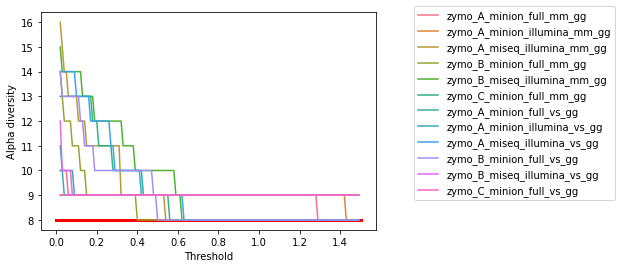

In [103]:
plt.plot([0,1.5],[8,8], color = 'red', linewidth = 3)
sns.lineplot(x = 'Threshold', y = 'Alpha diversity', hue = 'Sample', data = alpha_threshold_df_percent[alpha_threshold_df_percent['Threshold'] > 0.01])
plt.legend(bbox_to_anchor=(1.1, 1.05))

# Percent sample thresholds

In [37]:
# combine reps
# Three dfs
# Filtering by sample percent for OTU99, species, genera
# Each table has sample name, alpha diversity, and beta diversity from genera

In [156]:
full_alpha_df_grouped = full_alpha_df.copy()
full_alpha_df_grouped['index'] = [x[:4] + x[6:] for x in full_alpha_df_grouped.index]
full_alpha_df_grouped = full_alpha_df_grouped.groupby('index').mean()
full_alpha_df_grouped

,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__mb2424;g__unclassified;s__unclassified;otu__gg_810882;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_1139886;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_114018;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_114260;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_249325;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_3770158;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_4318789;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_618743;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_663691;,k__Bacteria;p__Acidobacteria;c__Acidobacteria-6;o__iii1-15;f__unclassified;g__unclassified;s__unclassified;otu__gg_732154;,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__unclassified;s__unclassified;otu__gg_817619;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__unclassified;s__unclassified;otu__gg_905674;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__nitroreducens;otu__gg_182880;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_4407224;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_582124;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_640071;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__unclassified;otu__gg_648049;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_463301;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_836394;,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__unclassified;s__unclassified;otu__gg_849314;
index,,,,,,,,,,,,,,,,,,,,,
zymo_minion_full_mm_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_minion_full_vs_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_minion_illumina_mm_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_minion_illumina_vs_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
zymo_miseq_illumina_mm_gg,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymo_miseq_illumina_vs_gg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.5,0.0,0.5,0.5,0.5,0.0,0.5,0.0,0.5,0.5


In [100]:
def filter_percent_sample_threshold(df, threshold):
    for index, row in df.iterrows():
        total_count = sum(row)
        threshold_value = total_count*threshold
#         print(threshold_value)
        df.loc[index] = row[row > threshold_value]
    return df.fillna(0)

In [101]:
full_alpha_df_grouped_threshold_tmp = filter_percent_sample_threshold(full_alpha_df_grouped.copy(), 0.001)
print(full_alpha_df_grouped.sum(axis = 1))
print(full_alpha_df_grouped_threshold_tmp.sum(axis = 1))

index
zymo_minion_full_mm_gg        116830.333333
zymo_minion_full_vs_gg         26878.666667
zymo_minion_illumina_mm_gg    116705.000000
zymo_minion_illumina_vs_gg     76896.000000
zymo_miseq_illumina_mm_gg      55747.500000
zymo_miseq_illumina_vs_gg      53820.000000
dtype: float64
index
zymo_minion_full_mm_gg        102352.666667
zymo_minion_full_vs_gg         25621.666667
zymo_minion_illumina_mm_gg     91496.000000
zymo_minion_illumina_vs_gg     67275.000000
zymo_miseq_illumina_mm_gg      48559.000000
zymo_miseq_illumina_vs_gg      49481.000000
dtype: float64


In [228]:
def group_species(full_alpha_filtered_species, level):
    if level == 'species':
        full_alpha_filtered_species.columns = [x.split('otu')[0] for x in full_alpha_filtered_species.columns]
    elif level == 'genus':
        full_alpha_filtered_species.columns = [';'.join(x.split(';')[:-3]) + ';' for x in full_alpha_filtered_species.columns]
    else:
        print('Error')
    full_alpha_filtered_species.reset_index(inplace = True)
    full_alpha_filtered_species_melted = full_alpha_filtered_species.melt(id_vars = 'index')
    full_alpha_filtered_species_melted = full_alpha_filtered_species_melted.groupby(['index', 'variable']).sum()
    full_alpha_filtered_species_melted.reset_index(inplace = True)
    df_index = full_alpha_filtered_species_melted.groupby('index', sort=False).sum().index
    df_columns = full_alpha_filtered_species_melted[full_alpha_filtered_species_melted['index'] == 'zymo_minion_full_vs_gg']['variable']
    full_alpha_filtered_species_melted_reshaped = pd.DataFrame(index = df_index, columns = df_columns)

    for h in df_index:
        for k in df_columns:
            if k in full_alpha_filtered_species_melted[full_alpha_filtered_species_melted['index']== h]['variable'].values:
                full_alpha_filtered_species_melted_reshaped.loc[h,k] = full_alpha_filtered_species_melted[(full_alpha_filtered_species_melted['index'] == h) & (full_alpha_filtered_species_melted['variable'] == k)]['value'].values[0]
            else:
                full_alpha_filtered_species_melted_reshaped.loc[i,j] = 0
    return full_alpha_filtered_species_melted_reshaped

In [275]:
# percent sample threshold
start = time.time()
combined_threshold_all = {}
for level in ['otu','species','genus']:
    filter_threshold = []
    alpha_dict = {key: [] for key in full_alpha_df_grouped.index}
    beta_dict = {key: [] for key in full_alpha_df_grouped.index}
    alpha_dict_first = {key: 0 for key in full_alpha_df_grouped.index}
    beta_dict_first = {key: 0 for key in full_alpha_df_grouped.index}
    if level == 'otu':
        otu_species_genus = full_alpha_df_grouped.copy()
    else:
        print(len(full_alpha_df_grouped.columns))
        otu_species_genus = group_species(full_alpha_df_grouped.copy(), level)
        print(len(otu_species_genus.columns))
    for i in np.arange(0, 0.01, 0.0001):
        filter_threshold.append(i)
        full_alpha_filtered = filter_percent_sample_threshold(otu_species_genus.copy(), i)
        full_alpha_filtered_genus = genus_family_alpha_diversity_no_unclassified(full_alpha_filtered.copy())
        observed_otus_filtered = alpha_diversity('observed_otus', full_alpha_filtered_genus, full_alpha_filtered_genus.index)
        full_alpha_filtered_genus.columns = full_alpha_filtered_genus.columns.droplevel()
        full_alpha_filtered_genus_tmp = full_alpha_filtered_genus.copy().reset_index()
        full_alpha_filtered_genus_tmp_melted = full_alpha_filtered_genus_tmp.melt(id_vars = 'index')
        full_alpha_filtered_genus_tmp_melted = full_alpha_filtered_genus_tmp_melted.groupby(['index', 'variable']).sum()
        full_alpha_filtered_genus_tmp_melted = full_alpha_filtered_genus_tmp_melted.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
        full_alpha_filtered_genus_tmp_melted.rename(columns= {'variable':'Genus','value':'Abundance'}, inplace = True)

        df_index = full_alpha_filtered_genus_tmp_melted.groupby('index', sort=False).sum().index
        df_columns = full_alpha_filtered_genus_tmp_melted[full_alpha_filtered_genus_tmp_melted['index'] == 'zymo_minion_full_vs_gg']['Genus']
        full_alpha_filtered_genus_tmp_melted_reshaped = pd.DataFrame(index = df_index, columns = df_columns)

        for h in df_index:
            for k in df_columns:
                if k in full_alpha_filtered_genus_tmp_melted[full_alpha_filtered_genus_tmp_melted['index']== h]['Genus'].values:
                    full_alpha_filtered_genus_tmp_melted_reshaped.loc[h,k] = full_alpha_filtered_genus_tmp_melted[(full_alpha_filtered_genus_tmp_melted['index'] == h) & (full_alpha_filtered_genus_tmp_melted['Genus'] == k)]['Abundance'].values[0]
                else:
                    full_alpha_filtered_genus_tmp_melted_reshaped.loc[i,j] = 0
        full_alpha_filtered_genus_tmp_melted_reshaped = full_alpha_filtered_genus_tmp_melted_reshaped.fillna(0)
        tmp_df = pd.concat([full_alpha_filtered_genus_tmp_melted_reshaped, zymo_true]).fillna(0)
        bc_dm_genus_tmp = beta_diversity('braycurtis', tmp_df.fillna(0), tmp_df.index)
        bc_df_genus_df_tmp = pd.DataFrame(bc_dm_genus_tmp.data, index = bc_dm_genus_tmp.ids, columns = bc_dm_genus_tmp.ids)
        for j in range(len(alpha_dict.keys())):
            if observed_otus_filtered[j] <= 8:
                if alpha_dict_first[list(alpha_dict_first.keys())[j]] == 0:
                    alpha_dict_first[list(alpha_dict_first.keys())[j]] = i
                if beta_dict_first[list(beta_dict_first.keys())[j]] == 0:
                    beta_dict_first[list(beta_dict_first.keys())[j]] = bc_df_genus_df_tmp.loc['Zymo',list(beta_dict.keys())[j]]
            alpha_dict[list(alpha_dict.keys())[j]].append(observed_otus_filtered[j])
            beta_dict[list(beta_dict.keys())[j]].append(bc_df_genus_df_tmp.loc['Zymo',list(beta_dict.keys())[j]])
    combined_threshold = return_threshold_df(alpha_dict, beta_dict, filter_threshold, 'percent_' + level)
    combined_threshold_all[level] = combined_threshold
end = time.time()
print(end - start)

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

5015
314


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

5015
239


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to b

239.48690700531006


/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [281]:
combined_threshold_tmp = combined_threshold_all_jaccard['otu']
lowest_beta_threshold = {key: 0 for key in combined_threshold_tmp['Sample']}
for i in set(combined_threshold_tmp['Sample']):
    tmp_df = combined_threshold_tmp[combined_threshold_tmp['Sample'] == i]
    min_beta = min(tmp_df['Beta diversity'])
    lowest_beta_threshold[i] = tmp_df[tmp_df['Beta diversity'] == min_beta]['Threshold'].values[0]
print(np.mean(list(lowest_beta_threshold.values())))
lowest_beta_threshold

0.00265


{'zymo_minion_full_mm_gg': 0.0006000000000000001,
 'zymo_minion_full_vs_gg': 0.0002,
 'zymo_minion_illumina_mm_gg': 0.0033,
 'zymo_minion_illumina_vs_gg': 0.0024000000000000002,
 'zymo_miseq_illumina_mm_gg': 0.0045000000000000005,
 'zymo_miseq_illumina_vs_gg': 0.0049}

In [276]:
combined_threshold_tmp = combined_threshold_all['species']
lowest_beta_threshold = {key: 0 for key in combined_threshold_tmp['Sample']}
for i in set(combined_threshold_tmp['Sample']):
    tmp_df = combined_threshold_tmp[combined_threshold_tmp['Sample'] == i]
    min_beta = min(tmp_df['Beta diversity'])
    lowest_beta_threshold[i] = tmp_df[tmp_df['Beta diversity'] == min_beta]['Threshold'].values[0]
lowest_beta_threshold

{'zymo_minion_full_mm_gg': 0.0007,
 'zymo_minion_full_vs_gg': 0.0,
 'zymo_minion_illumina_mm_gg': 0.009600000000000001,
 'zymo_minion_illumina_vs_gg': 0.0037,
 'zymo_miseq_illumina_mm_gg': 0.0058000000000000005,
 'zymo_miseq_illumina_vs_gg': 0.0049}

In [283]:
combined_threshold_tmp = combined_threshold_all['otu']
lowest_beta_threshold = {key: 0 for key in combined_threshold_tmp['Sample']}
for i in set(combined_threshold_tmp['Sample']):
    tmp_df = combined_threshold_tmp[combined_threshold_tmp['Sample'] == i]
    min_beta = min(tmp_df['Beta diversity'])
    lowest_beta_threshold[i] = tmp_df[tmp_df['Beta diversity'] == min_beta]['Threshold'].values[0]
print(np.mean(list(lowest_beta_threshold.values())[:4]))
lowest_beta_threshold

0.00135


{'zymo_minion_full_mm_gg': 0.0,
 'zymo_minion_full_vs_gg': 0.0,
 'zymo_minion_illumina_mm_gg': 0.0026000000000000003,
 'zymo_minion_illumina_vs_gg': 0.0028,
 'zymo_miseq_illumina_mm_gg': 0.0014,
 'zymo_miseq_illumina_vs_gg': 0.0032}

In [242]:
tmp_df = combined_threshold_all['otu']
tmp_df[tmp_df['Threshold'] == 0]

,Threshold,Sample,Alpha diversity,Beta diversity
0,0.0,zymo_minion_full_mm_gg,58,0.138569
40,0.0,zymo_minion_full_vs_gg,10,0.138001
80,0.0,zymo_minion_illumina_mm_gg,45,0.158155
120,0.0,zymo_minion_illumina_vs_gg,18,0.153760
160,0.0,zymo_miseq_illumina_mm_gg,80,0.099006
200,0.0,zymo_miseq_illumina_vs_gg,47,0.120491


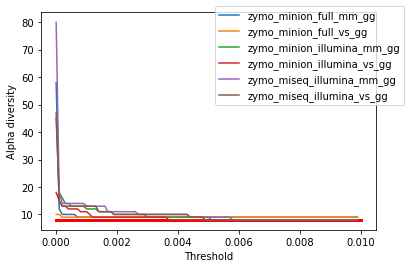

In [258]:
plt.plot([0,0.01],[8,8], color = 'red', linewidth = 3)
sns.lineplot(x = 'Threshold', y = 'Alpha diversity', hue = 'Sample', data = combined_threshold_all['species'])
plt.legend(bbox_to_anchor=(1.1, 1.05))

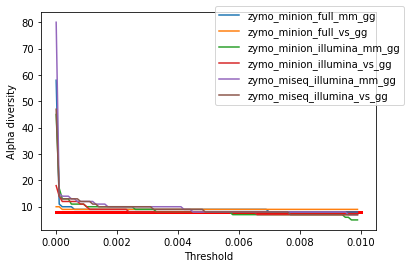

In [256]:
plt.plot([0,0.01],[8,8], color = 'red', linewidth = 3)
sns.lineplot(x = 'Threshold', y = 'Alpha diversity', hue = 'Sample', data = combined_threshold_all['otu'])
plt.legend(bbox_to_anchor=(1.1, 1.05))

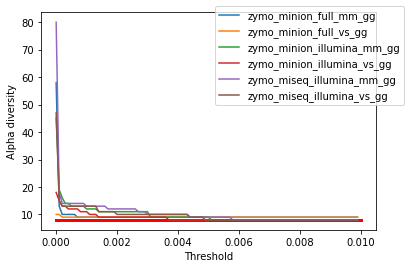

In [260]:
plt.plot([0,0.01],[8,8], color = 'red', linewidth = 3)
sns.lineplot(x = 'Threshold', y = 'Alpha diversity', hue = 'Sample', data = combined_threshold_all['genus'])
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [272]:
combined_threshold_all['genus'][combined_threshold_all['genus']['Threshold'] == 0.0002]

,Threshold,Sample,Alpha diversity,Beta diversity
2,0.0002,zymo_minion_full_mm_gg,10,0.137898
102,0.0002,zymo_minion_full_vs_gg,9,0.138022
202,0.0002,zymo_minion_illumina_mm_gg,16,0.157359
302,0.0002,zymo_minion_illumina_vs_gg,13,0.153453
402,0.0002,zymo_miseq_illumina_mm_gg,14,0.098140
502,0.0002,zymo_miseq_illumina_vs_gg,13,0.119843
